In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import dataset into a pandas data frame

predictions_df = pd.read_csv('../predictions.csv')
predictions_df.head()

,UP,h35,spacs,h10,disc,ITR,Observed log(TX/Txref),Predicted log(TX/Txref),Our Prediction
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGG,CTCTACCTTAGTTTGTACGTT,-3.386326,-3.844827,-4.049288
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGG,CTCTACCTTAGTTTGTACGTT,-3.503140,-3.905283,-4.041058
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCG,CTCTACCTTAGTTTGTACGTT,-4.207206,-3.905283,-4.135313
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGC,CTCTACCTTAGTTTGTACGTT,-3.392439,-3.877808,-4.030675
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGC,CTCTACCTTAGTTTGTACGTT,-3.698903,-3.672384,-3.941935


In [9]:
from sklearn.preprocessing import MinMaxScaler

predictions_df['Normalized Observed'] = MinMaxScaler().fit_transform(predictions_df[['Observed log(TX/Txref)']])
predictions_df['Normalized Predicted log(TX/Txref)'] = MinMaxScaler().fit_transform(predictions_df[['Predicted log(TX/Txref)']])

predictions_df.head()

,UP,h35,spacs,h10,disc,ITR,Observed log(TX/Txref),Predicted log(TX/Txref),Our Prediction,Normalized Observed,Normalized log(TX/Txref),Normalized Predicted log(TX/Txref)
0,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CCCCGCGG,CTCTACCTTAGTTTGTACGTT,-3.386326,-3.844827,-4.049288,0.294388,0.091926,0.091926
1,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGGCGG,CTCTACCTTAGTTTGTACGTT,-3.503140,-3.905283,-4.041058,0.270048,0.069424,0.069424
2,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGCGCCCG,CTCTACCTTAGTTTGTACGTT,-4.207206,-3.905283,-4.135313,0.123341,0.069424,0.069424
3,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,GCGGCGGC,CTCTACCTTAGTTTGTACGTT,-3.392439,-3.877808,-4.030675,0.293115,0.079650,0.079650
4,TTTTCTATCTACGTAC,TTGACA,CTATTTCCTATTTCTCT,TATAAT,CGGGGGGC,CTCTACCTTAGTTTGTACGTT,-3.698903,-3.672384,-3.941935,0.229256,0.156108,0.156108


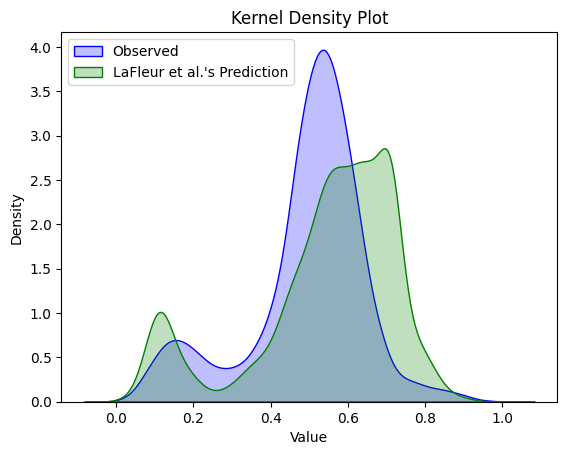

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(predictions_df['Normalized Observed'], fill=True, color='blue', label='Observed')
sns.kdeplot(predictions_df['Normalized Predicted log(TX/Txref)'], fill=True, color='green', label='LaFleur et al.\'s Prediction')

plt.title('Kernel Density Plot')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


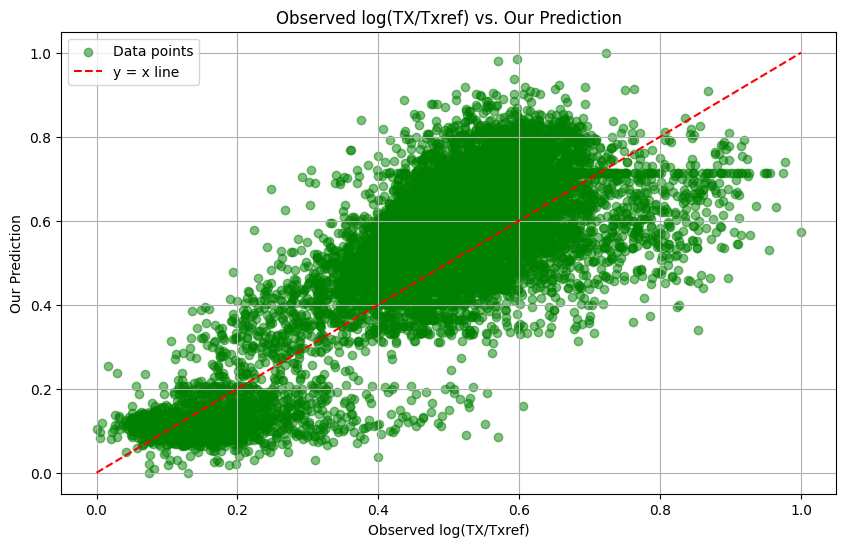

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `our_prediction` and `observed` are already defined

plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Normalized Observed'], predictions_df['Normalized Predicted log(TX/Txref)'], color='green', alpha=0.5, label='Data points')

# Adding the y = x line
min_val = 0
max_val = 1
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x line')

plt.title('Observed log(TX/Txref) vs. Our Prediction')
plt.xlabel('Observed log(TX/Txref)')
plt.ylabel('Our Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
predicted = predictions_df['Normalized Predicted log(TX/Txref)']
observed = predictions_df['Normalized Observed']

MSE = np.mean((predicted - observed) ** 2)

print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 0.01515144774980594


In [18]:
0.009844223968684673/0.01515144774980594

0.649721672228369